In [1]:
#acs-trigger-rate

In [2]:
import re
import time
import requests

import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline


In [5]:
log_lines = []

for l in open("ibas_acsmonitor_log.txt"):
    if re.match(".*? +2021-0[123]-.*?", l): # or re.match(".*? +2020-1.*?", l):
        log_lines.append(l)
        
        
recent_log = "\n".join(log_lines)
        

In [6]:
events=[]

for l in recent_log.split("\n"):
    for n, rex in [
        (
            '0 - pre-detection',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: The best burst is:  OBT=(?P<obt>.*?)  s=(?P<sigma>.*?)  bgrd=(?P<background>[0-9\.]*)'
        ),
        (
            '1 - background-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]+?) is out of range <5400.0 : 7500.0>'
        ),
        (
            '2 - background-in-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]*?) is in acceptable range <(?P<backgroundl1>[0-9\.]*?) : (?P<backgroundl2>[0-9\.]*?)>'
        ),
        (
            '3 - sc-distance-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: S/C distance (?P<scdistance>[0-9\.]*?) is out of range <(?P<scdistancel1>[0-9\.]*?) : (?P<scdistancel2>[0-9\.]*?)>'
        ),
        (
            '9 - distributed-detection',
            '^.*? +(?P<date>20.*?) .*?LC/EPH: OBT=(.*?) past=(.*?) future=(.*?) delay=(.*?) fname=.*?'
        )
    ]:
        r = re.search(rex, l)
        if r:
            R = r.groupdict()
            print(n, R)
            events.append(
                {**R,
                **dict(
                    event=n,
                    date=R['date'],
                    time_s=time.mktime(time.strptime(R['date'], "%Y-%m-%dT%H:%M:%S"))
                )}
            )

0 - pre-detection {'date': '2021-01-05T09:01:54', 'obt': '43971323.543', 'sigma': '6.009', 'background': '6664.4'}
2 - background-in-range {'date': '2021-01-05T09:01:54', 'background': '6664.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-05T09:01:54', 'scdistance': '76239.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-05T09:04:50', 'obt': '43971473.743', 'sigma': '7.505', 'background': '6683.6'}
2 - background-in-range {'date': '2021-01-05T09:04:50', 'background': '6683.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-05T09:04:50', 'scdistance': '75921.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-05T09:38:10', 'obt': '43973491.593', 'sigma': '9.173', 'background': '6754.5'}
2 - background-in-range {'date': '2021-01-05T09:38:10', 'background': '6754.5', 'backgroundl1': '5400.0', 'back

0 - pre-detection {'date': '2021-01-08T01:22:58', 'obt': '44202977.893', 'sigma': '6.061', 'background': '10068.6'}
1 - background-out-of-range {'date': '2021-01-08T01:22:58', 'background': '10068.6'}
0 - pre-detection {'date': '2021-01-08T01:26:02', 'obt': '44203160.493', 'sigma': '9.121', 'background': '10370.3'}
1 - background-out-of-range {'date': '2021-01-08T01:26:02', 'background': '10370.3'}
0 - pre-detection {'date': '2021-01-08T01:26:26', 'obt': '44203175.593', 'sigma': '17.165', 'background': '10385.7'}
1 - background-out-of-range {'date': '2021-01-08T01:26:26', 'background': '10385.7'}
0 - pre-detection {'date': '2021-01-08T01:28:34', 'obt': '44203311.743', 'sigma': '9.087', 'background': '10876.2'}
1 - background-out-of-range {'date': '2021-01-08T01:28:34', 'background': '10876.2'}
0 - pre-detection {'date': '2021-01-08T01:28:34', 'obt': '44203315.743', 'sigma': '9.037', 'background': '10799.8'}
1 - background-out-of-range {'date': '2021-01-08T01:28:34', 'background': '1079

0 - pre-detection {'date': '2021-01-13T09:05:22', 'obt': '44662738.143', 'sigma': '6.040', 'background': '6510.8'}
2 - background-in-range {'date': '2021-01-13T09:05:22', 'background': '6510.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-13T09:05:22', 'scdistance': '71843.0', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-13T09:07:06', 'obt': '44662826.793', 'sigma': '12.863', 'background': '6521.5'}
2 - background-in-range {'date': '2021-01-13T09:07:06', 'background': '6521.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-13T09:07:06', 'scdistance': '71645.4', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-13T09:07:46', 'obt': '44662851.993', 'sigma': '35.698', 'background': '6607.1'}
2 - background-in-range {'date': '2021-01-13T09:07:46', 'background': '6607.1', 'backgroundl1': '5400.0', 'ba

0 - pre-detection {'date': '2021-02-08T22:27:48', 'obt': '46957282.793', 'sigma': '9.534', 'background': '6605.1'}
2 - background-in-range {'date': '2021-02-08T22:27:48', 'background': '6605.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-08T22:27:48', 'scdistance': '80438.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-08T22:28:20', 'obt': '46957288.893', 'sigma': '22.003', 'background': '6580.2'}
2 - background-in-range {'date': '2021-02-08T22:28:20', 'background': '6580.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-08T22:28:20', 'scdistance': '80426.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-08T22:31:40', 'obt': '46957494.293', 'sigma': '9.323', 'background': '6586.4'}
2 - background-in-range {'date': '2021-02-08T22:31:40', 'background': '6586.4', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-08T23:30:44', 'obt': '46961056.093', 'sigma': '10.171', 'background': '10321.3'}
1 - background-out-of-range {'date': '2021-02-08T23:30:44', 'background': '10321.3'}
0 - pre-detection {'date': '2021-02-08T23:32:28', 'obt': '46961141.393', 'sigma': '42.875', 'background': '8080.9'}
1 - background-out-of-range {'date': '2021-02-08T23:32:28', 'background': '8080.9'}
0 - pre-detection {'date': '2021-02-08T23:33:08', 'obt': '46961171.993', 'sigma': '205.605', 'background': '7798.5'}
1 - background-out-of-range {'date': '2021-02-08T23:33:08', 'background': '7798.5'}
0 - pre-detection {'date': '2021-02-08T23:36:44', 'obt': '46961401.793', 'sigma': '9.146', 'background': '10491.3'}
1 - background-out-of-range {'date': '2021-02-08T23:36:44', 'background': '10491.3'}
0 - pre-detection {'date': '2021-02-08T23:36:44', 'obt': '46961403.943', 'sigma': '9.797', 'background': '10360.8'}
1 - background-out-of-range {'date': '2021-02-08T23:36:44', 'background': '10360

0 - pre-detection {'date': '2021-02-14T04:01:16', 'obt': '47409268.743', 'sigma': '9.177', 'background': '6465.7'}
2 - background-in-range {'date': '2021-02-14T04:01:16', 'background': '6465.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T04:01:16', 'scdistance': '94874.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T04:11:56', 'obt': '47409904.543', 'sigma': '9.252', 'background': '6407.1'}
2 - background-in-range {'date': '2021-02-14T04:11:56', 'background': '6407.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T04:11:56', 'scdistance': '93802.0', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T04:48:53', 'obt': '47412133.943', 'sigma': '9.005', 'background': '6412.8'}
2 - background-in-range {'date': '2021-02-14T04:48:53', 'background': '6412.8', 'backgroundl1': '5400.0', 'back

0 - pre-detection {'date': '2021-02-14T07:14:44', 'obt': '47420912.093', 'sigma': '6.232', 'background': '6657.2'}
2 - background-in-range {'date': '2021-02-14T07:14:44', 'background': '6657.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:14:44', 'scdistance': '72472.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T07:35:56', 'obt': '47422153.243', 'sigma': '6.397', 'background': '6619.1'}
2 - background-in-range {'date': '2021-02-14T07:35:56', 'background': '6619.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:35:56', 'scdistance': '69674.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T07:38:20', 'obt': '47422286.593', 'sigma': '11.325', 'background': '6811.8'}
2 - background-in-range {'date': '2021-02-14T07:38:20', 'background': '6811.8', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-16T22:45:40', 'obt': '47649521.093', 'sigma': '8.644', 'background': '6531.5'}
2 - background-in-range {'date': '2021-02-16T22:45:40', 'background': '6531.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:45:40', 'scdistance': '75437.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-16T22:55:08', 'obt': '47650110.593', 'sigma': '6.618', 'background': '6549.6'}
2 - background-in-range {'date': '2021-02-16T22:55:08', 'background': '6549.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:55:08', 'scdistance': '74167.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-19T01:23:33', 'obt': '47831842.393', 'sigma': '11.871', 'background': '6658.0'}
2 - background-in-range {'date': '2021-02-19T01:23:33', 'background': '6658.0', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-22T02:23:02', 'obt': '48094588.143', 'sigma': '9.093', 'background': '6608.0'}
2 - background-in-range {'date': '2021-02-22T02:23:02', 'background': '6608.0', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:23:02'}
0 - pre-detection {'date': '2021-02-22T02:24:52', 'obt': '48094707.543', 'sigma': '11.134', 'background': '6806.4'}
2 - background-in-range {'date': '2021-02-22T02:24:52', 'background': '6806.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:24:52'}
0 - pre-detection {'date': '2021-02-22T02:27:32', 'obt': '48094837.693', 'sigma': '6.127', 'background': '6810.2'}
2 - background-in-range {'date': '2021-02-22T02:27:32', 'background': '6810.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:27:32'}
0 - pre-detection {'date': '2021-02-22T02:32:31', 'obt': '48095141.093', 'sigma': '9

0 - pre-detection {'date': '2021-02-22T03:54:37', 'obt': '48100081.043', 'sigma': '48.810', 'background': '6436.3'}
2 - background-in-range {'date': '2021-02-22T03:54:37', 'background': '6436.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:54:37', 'scdistance': '93141.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T03:59:24', 'obt': '48100352.093', 'sigma': '9.843', 'background': '7154.9'}
2 - background-in-range {'date': '2021-02-22T03:59:24', 'background': '7154.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:59:24', 'scdistance': '92676.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:02:05', 'obt': '48100521.593', 'sigma': '9.555', 'background': '8031.5'}
1 - background-out-of-range {'date': '2021-02-22T04:02:05', 'background': '8031.5'}
0 - pre-detection {'date':

0 - pre-detection {'date': '2021-02-22T04:52:36', 'obt': '48103551.093', 'sigma': '6.433', 'background': '6700.6'}
2 - background-in-range {'date': '2021-02-22T04:52:36', 'background': '6700.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:52:36', 'scdistance': '86957.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:57:48', 'obt': '48103886.443', 'sigma': '13.478', 'background': '6893.8'}
2 - background-in-range {'date': '2021-02-22T04:57:48', 'background': '6893.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:57:48', 'scdistance': '86333.4', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:59:17', 'obt': '48103967.343', 'sigma': '11.462', 'background': '7031.7'}
2 - background-in-range {'date': '2021-02-22T04:59:17', 'background': '7031.7', 'backgroundl1': '5400.0', 'ba

0 - pre-detection {'date': '2021-02-22T06:04:29', 'obt': '48107867.193', 'sigma': '20.208', 'background': '7603.2'}
1 - background-out-of-range {'date': '2021-02-22T06:04:29', 'background': '7603.2'}
0 - pre-detection {'date': '2021-02-22T06:09:33', 'obt': '48108156.993', 'sigma': '9.260', 'background': '8304.5'}
1 - background-out-of-range {'date': '2021-02-22T06:09:33', 'background': '8304.5'}
0 - pre-detection {'date': '2021-02-22T06:09:33', 'obt': '48108159.393', 'sigma': '9.132', 'background': '8150.7'}
1 - background-out-of-range {'date': '2021-02-22T06:09:33', 'background': '8150.7'}
0 - pre-detection {'date': '2021-02-22T06:13:56', 'obt': '48108421.393', 'sigma': '9.093', 'background': '8671.7'}
1 - background-out-of-range {'date': '2021-02-22T06:13:56', 'background': '8671.7'}
0 - pre-detection {'date': '2021-02-22T06:17:09', 'obt': '48108637.143', 'sigma': '9.747', 'background': '8706.4'}
1 - background-out-of-range {'date': '2021-02-22T06:17:09', 'background': '8706.4'}
0 - 

0 - pre-detection {'date': '2021-02-23T02:00:53', 'obt': '48179676.693', 'sigma': '9.113', 'background': '6865.8'}
2 - background-in-range {'date': '2021-02-23T02:00:53', 'background': '6865.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-23T02:00:53'}
0 - pre-detection {'date': '2021-02-23T02:09:01', 'obt': '48180071.343', 'sigma': '6.217', 'background': '6832.2'}
2 - background-in-range {'date': '2021-02-23T02:09:01', 'background': '6832.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-23T02:09:01'}
0 - pre-detection {'date': '2021-02-23T04:20:21', 'obt': '48187845.993', 'sigma': '7.008', 'background': '6765.8'}
2 - background-in-range {'date': '2021-02-23T04:20:21', 'background': '6765.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-23T04:20:21'}
0 - pre-detection {'date': '2021-02-23T04:30:29', 'obt': '48188625.043', 'sigma': '9.

0 - pre-detection {'date': '2021-02-24T20:23:41', 'obt': '48332225.943', 'sigma': '40.776', 'background': '7895.1'}
1 - background-out-of-range {'date': '2021-02-24T20:23:41', 'background': '7895.1'}
0 - pre-detection {'date': '2021-02-24T20:25:09', 'obt': '48332313.393', 'sigma': '61.756', 'background': '7510.4'}
1 - background-out-of-range {'date': '2021-02-24T20:25:09', 'background': '7510.4'}
0 - pre-detection {'date': '2021-02-24T20:26:45', 'obt': '48332420.893', 'sigma': '9.302', 'background': '6607.3'}
2 - background-in-range {'date': '2021-02-24T20:26:45', 'background': '6607.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T20:26:45', 'scdistance': '88734.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T20:27:41', 'obt': '48332455.643', 'sigma': '10.738', 'background': '6671.2'}
2 - background-in-range {'date': '2021-02-24T20:27:41', 'background': '6671.2', 'backgroundl1': '

0 - pre-detection {'date': '2021-02-24T21:48:21', 'obt': '48337287.543', 'sigma': '9.237', 'background': '6505.3'}
2 - background-in-range {'date': '2021-02-24T21:48:21', 'background': '6505.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T21:48:21', 'scdistance': '79384.0', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T21:50:29', 'obt': '48337435.243', 'sigma': '6.033', 'background': '6668.9'}
2 - background-in-range {'date': '2021-02-24T21:50:29', 'background': '6668.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T21:50:29', 'scdistance': '79082.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T21:53:36', 'obt': '48337611.093', 'sigma': '14.867', 'background': '6633.9'}
2 - background-in-range {'date': '2021-02-24T21:53:36', 'background': '6633.9', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-24T22:45:32', 'obt': '48340711.343', 'sigma': '9.036', 'background': '7516.6'}
1 - background-out-of-range {'date': '2021-02-24T22:45:32', 'background': '7516.6'}
0 - pre-detection {'date': '2021-02-24T22:47:24', 'obt': '48340848.543', 'sigma': '9.451', 'background': '7926.1'}
1 - background-out-of-range {'date': '2021-02-24T22:47:24', 'background': '7926.1'}
0 - pre-detection {'date': '2021-02-24T22:47:33', 'obt': '48340853.143', 'sigma': '25.301', 'background': '7731.8'}
1 - background-out-of-range {'date': '2021-02-24T22:47:33', 'background': '7731.8'}
0 - pre-detection {'date': '2021-02-24T22:47:57', 'obt': '48340861.593', 'sigma': '77.777', 'background': '7894.2'}
1 - background-out-of-range {'date': '2021-02-24T22:47:57', 'background': '7894.2'}
0 - pre-detection {'date': '2021-02-24T22:51:17', 'obt': '48341074.093', 'sigma': '60.536', 'background': '12358.7'}
1 - background-out-of-range {'date': '2021-02-24T22:51:17', 'background': '12358.7'}


0 - pre-detection {'date': '2021-03-02T00:37:17', 'obt': '48779424.793', 'sigma': '9.181', 'background': '6567.5'}
2 - background-in-range {'date': '2021-03-02T00:37:17', 'background': '6567.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-03-02T00:37:17', 'scdistance': '108828.6', 'scdistancel1': '7000.0', 'scdistancel2': '110000.0'}
0 - pre-detection {'date': '2021-03-02T00:53:57', 'obt': '48780426.893', 'sigma': '9.240', 'background': '6580.7'}
2 - background-in-range {'date': '2021-03-02T00:53:57', 'background': '6580.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-03-02T00:53:57', 'scdistance': '107434.3', 'scdistancel1': '7000.0', 'scdistancel2': '110000.0'}
0 - pre-detection {'date': '2021-03-02T00:57:25', 'obt': '48780629.693', 'sigma': '9.357', 'background': '6593.4'}
2 - background-in-range {'date': '2021-03-02T00:57:25', 'background': '6593.4', 'backgroundl1': '5400.0', 'ba

0 - pre-detection {'date': '2021-03-02T03:37:49', 'obt': '48790251.943', 'sigma': '7.165', 'background': '6580.3'}
2 - background-in-range {'date': '2021-03-02T03:37:49', 'background': '6580.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-03-02T03:37:49', 'scdistance': '92060.5', 'scdistancel1': '7000.0', 'scdistancel2': '110000.0'}
0 - pre-detection {'date': '2021-03-02T03:48:37', 'obt': '48790911.643', 'sigma': '9.148', 'background': '6813.3'}
2 - background-in-range {'date': '2021-03-02T03:48:37', 'background': '6813.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-03-02T03:48:37', 'scdistance': '90904.7', 'scdistancel1': '7000.0', 'scdistancel2': '110000.0'}
0 - pre-detection {'date': '2021-03-02T03:49:09', 'obt': '48790933.043', 'sigma': '15.797', 'background': '6813.1'}
2 - background-in-range {'date': '2021-03-02T03:49:09', 'background': '6813.1', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-03-02T06:11:49', 'obt': '48799501.743', 'sigma': '9.054', 'background': '6608.3'}
2 - background-in-range {'date': '2021-03-02T06:11:49', 'background': '6608.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-03-02T06:11:49', 'scdistance': '74085.7', 'scdistancel1': '7000.0', 'scdistancel2': '110000.0'}
0 - pre-detection {'date': '2021-03-02T06:15:09', 'obt': '48799692.143', 'sigma': '6.182', 'background': '6641.5'}
2 - background-in-range {'date': '2021-03-02T06:15:09', 'background': '6641.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-03-02T06:15:09', 'scdistance': '73670.5', 'scdistancel1': '7000.0', 'scdistancel2': '110000.0'}
0 - pre-detection {'date': '2021-03-02T06:16:46', 'obt': '48799815.843', 'sigma': '6.257', 'background': '6851.8'}
2 - background-in-range {'date': '2021-03-02T06:16:46', 'background': '6851.8', 'backgroundl1': '5400.0', 'back

In [9]:
iisot_format = "%Y-%m-%dT%H:%M:%S"

t0 = time.strptime("2021-02-22T00:00:00", iisot_format)
t0_s = time.mktime(t0)

t1 = time.strptime("2020-10-01T00:00:00", iisot_format)
t1_s = time.mktime(t1)

t2 = time.strptime("2021-03-03T00:00:00", iisot_format)
t2_s = time.mktime(t2)


t0_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t0)}/IJD").json())

t1_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t1)}/IJD").json())


t2_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t2)}/IJD").json())

t1_rev = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t1)}/REVNUM").json())
t2_rev = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t2)}/REVNUM").json())

t1_rev, t2_rev

(2280.0, 2338.0)

In [10]:
orbits=[]
attitudes=[]

for rev in range(int(t1_rev), int(t2_rev)+1):
    print("for", rev)
    
    rev_t1, rev_t2 = list(map(float, requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/REVNUM/{rev:d}/IJD").json().split()[1:]))
    
    
    R = requests.get("https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/sc/{:10g}/{:10g}?source=nrt".format(
        max(t1_ijd, rev_t1),
        min(t2_ijd, rev_t2),
    )).json()

    try:
        attitudes.append(R['attitude'])
        orbits.append(R['orbit'])
        
        print("found", attitudes[-1]['TIME'][0], attitudes[-1]['TIME'][-1])
    except:
        print(R)

for 2280
found 7579.028636388889 7579.689191944444
for 2281
found 7579.961796111111 7582.351113240741
for 2282
found 7582.617154907407 7584.997525277778
for 2283
found 7585.238636388889 7587.755904907407
for 2284
found 7587.9240877777775 7590.383254444444
for 2285
found 7590.579921111111 7593.0150021296295
for 2286
found 7593.209654907408 7595.733520648148
for 2287
found 7595.920025277778 7598.362745185185
for 2288
found 7598.556020648148 7600.991738240741
for 2289
found 7601.196032222222 7603.712965092593
for 2290
found 7603.880499814815 7606.2990993518515
for 2291
found 7606.535256759259 7608.968578518518
for 2292
found 7609.178451203704 7611.694053055556
for 2293
found 7611.927050740741 7614.330256759259
for 2294
found 7614.5190299074075 7616.942745185185
for 2295
found 7617.160048425926 7619.700650277778
for 2296
found 7619.835592407408 7622.300580833334
for 2297
found 7622.498242870371 7624.918844722222
for 2298
found 7625.139006759259 7627.679400277778
for 2299
found 7627.8703262

0 - pre-detection 598
since 56 days max of 30.0 per 3600 at -13
1 - background-out-of-range 166
since 53 days max of 30.0 per 3600 at -13
2 - background-in-range 432
since 56 days max of 25.0 per 3600 at 0.175
3 - sc-distance-out-of-range 352
since 56 days max of 25.0 per 3600 at 0.175
9 - distributed-detection 80
since 51 days max of 15.0 per 3600 at 0.0772


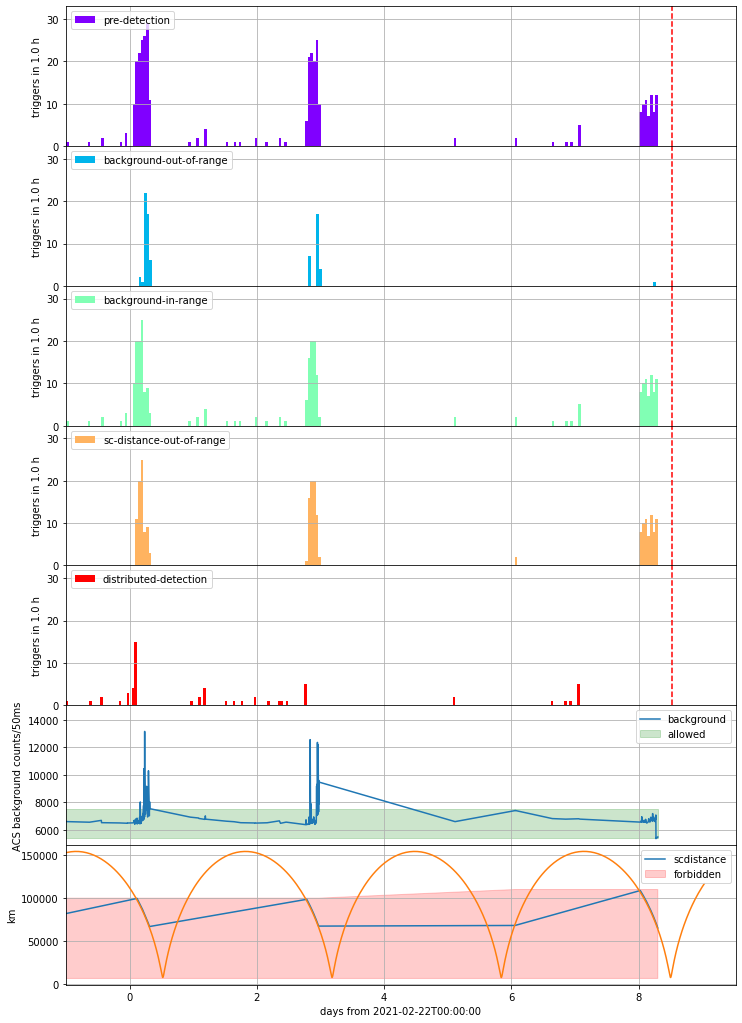

In [11]:

from matplotlib.pyplot import cm
cm.rainbow

all_kinds = sorted(set([ e['event'] for e in events ]))
colors = cm.rainbow(np.linspace(0,1,len(all_kinds)))

f, axes = plt.subplots(len(all_kinds) + 2,1, figsize=(12,18), sharex=True)

ymax = 0

for i_kind, (event_kind, ax, color) in enumerate(zip(all_kinds, axes, colors)):    
    _events = [e for e in events if e['event'] == event_kind and e['time_s'] > t1_s]
    print(event_kind, len(_events))
    
    t = np.array([e['time_s'] for e in _events])
    
    tbin_s = 3600
    
    h = ax.hist(        
        (t-t0_s)/24./3600.,
#        [i_kind for e in _events],
        label=event_kind.split()[-1],
        bins=int((t.max()-t.min())/tbin_s),
        color=color,
    )
    
    i_max = h[0].argmax()
    print(f"since {(t.max() - t.min())/24/3600:.2g} days max of {h[0][i_max]} per {tbin_s} at {h[1][i_max]:.3g}")
    tbin_s
    
    if h[0].max() > ymax:
        ymax = h[0].max()
    
    ax.set_ylim([0,400])
    
    ax.legend(loc=2)
    
    ax.grid(True)
    
    ax.set_ylabel(f"triggers in {tbin_s/3600.} h")
    
    ax.axvline((time.time() -t0_s)/24./3600., c='r', ls='--')
    
    
    #print(np.array([e['background'] for e in _events if 'background' in e]))
    

def plot_c(ax, c, **kwargs):
    t = np.array([e['time_s'] for e in events  if c in e])
    
    getv = lambda n,N=None: np.array([float(e[n]) for e in events if (N or n) in e])
    
    label = kwargs.pop('label', str(c))
    
    if isinstance(c, tuple):
        t = np.array([e['time_s'] for e in events  if c[0] in e])
                
        ax.fill_between(
            (t-t0_s)/24./3600,
            getv(c[0]),
            getv(c[1]),        
            label=label,
            alpha=0.2,
            **kwargs
        )
    else:
        ax.plot(
            (t-t0_s)/24./3600,
            getv(c),        
            label=label,
            **kwargs
        )
    ax.legend()

plot_c(axes[-2], 'background')
plot_c(axes[-2], ('backgroundl1', 'backgroundl2'), color="green", label="allowed")

axes[-2].set_ylabel("ACS background counts/50ms")
axes[-2].grid()

plot_c(axes[-1], 'scdistance')
axes[-1].plot(
    np.concatenate(
        [orbit['TIME'] for orbit in orbits]
    ) - t0_ijd, 
    np.concatenate(
        [orbit['RDIST'] for orbit in orbits]
    )
)
plot_c(axes[-1], ('scdistancel1', 'scdistancel2'), color="red", label="forbidden")
axes[-1].set_ylabel("km")
axes[-1].grid()


plt.subplots_adjust(hspace=0)

for ax in axes[:-2]:    
    ax.set_ylim([0, ymax*1.1])

plt.xlabel(f"days from {time.strftime(iisot_format, t0)}")

plt.xlim([-150, 
          (time.time() -t0_s)/24./3600. + 1])

plt.savefig("incident-long-history.png")

#plt.xlim([-20, 
#          (time.time() -t0_s)/24./3600. + 1])
#plt.savefig("incident-past-history.png")

plt.xlim([-1, 
          (time.time() -t0_s)/24./3600. + 1])

plt.savefig("incident-log.png")


In [52]:
t, r = np.concatenate(
        [orbit['TIME'] for orbit in orbits]
    ) - t0_ijd, np.concatenate(
        [orbit['RDIST'] for orbit in orbits]
    )

dt = t[1:] - t[:-1]
np.sum(dt[r[1:]>100000]) / np.sum(dt[r[1:]>0]), np.sum(dt[r[1:]>107000]) / np.sum(dt[r[1:]>0])

(0.6909171242267342, 0.649022967146007)

# Conclusion

this was the most impactful radiation belt background variation, the most triggers at least since 3 years.

this exact sort of trigger excess has regular background but was near belt edge. It could be mitigated by changing belt limit, if it continues to be problematic.


second pass showed similar behavior: RB is about 10% higher. It is difficult to veto with background, only orbit limit.